In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_Forest_Fire_CLEANED.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
## removing Unnecessary columns like - day, month , year as not required for model training:
df=df.drop(['day','month','year'],axis=1)
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

### Can also change the vlaues using df.replace() 

df['Classes'].replace(['not fire','fire'],[0,1])

In [8]:
## Encoding Classes:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [9]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

This above numbers match the fire and not fire numbers in the previous cells

In [10]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


### Dependednt and Independent Features

In [11]:
## Dependent and independent variables:
X = df.drop('FWI',axis=1)
y = df['FWI']

In [12]:
X.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0


In [13]:
y.head(2)

0    0.5
1    0.4
Name: FWI, dtype: float64

### Train / Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [15]:
X_train.shape , X_test.shape

((182, 11), (61, 11))

In [16]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0,0
141,31,72,14,0.2,60.2,3.8,8.0,0.8,3.7,0,1
192,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,1,1
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0,0
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0,0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0,0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0,0
179,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,1,1


## Feature selection based on Correlation:

In [17]:
## Feature correlation:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

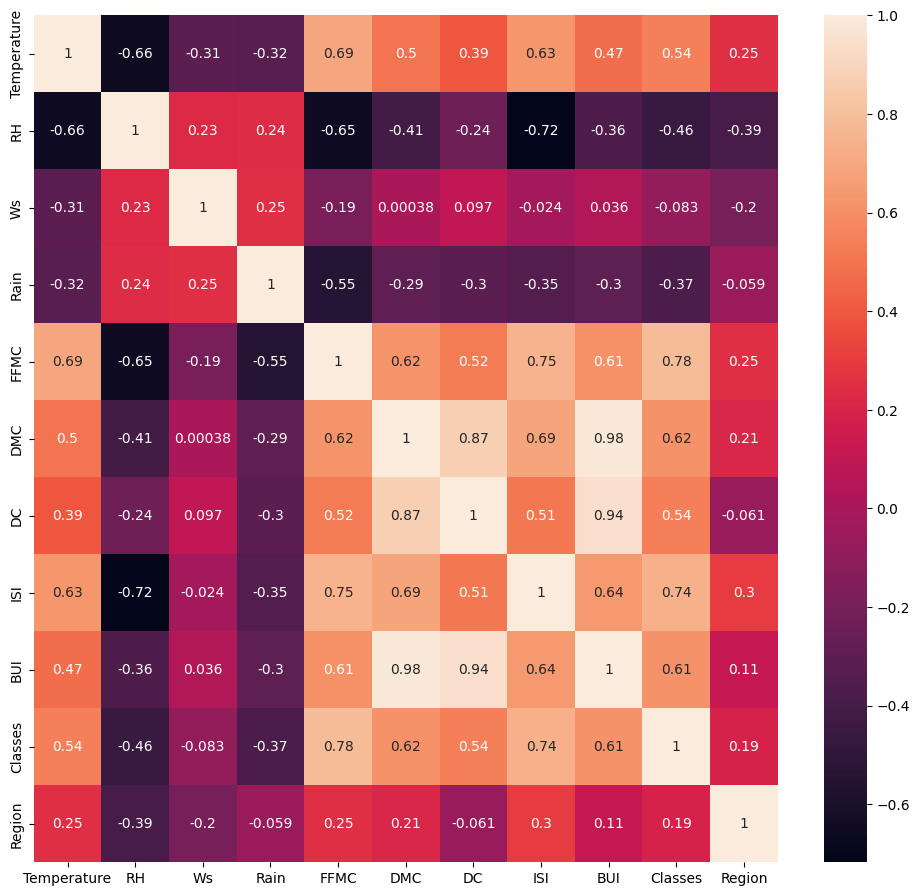

In [18]:
## checking for multicollinearity:
plt.figure(figsize=(12,11))
sns.heatmap(X_train.corr(),annot=True)

### Removing features with high collinearity:

In [19]:
def correlation(data,threshhold):
    col_corr=set()
    corr_matrix = data.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshhold:  ## Checking for both +ve and -ve Corr
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [20]:
## Threshold -- domain extertise :
corr_features = correlation(X_train,0.85)

In [21]:
corr_features

{'BUI', 'DC'}

In [22]:
## Dropping these columns/features:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)

X_train.shape , X_test.shape

((182, 9), (61, 9))

In [23]:
X_train.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1


## Feature Scaling / Standardization:

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

### Box plot to understand the effects of standard scaler:

Text(0.5, 1.0, 'X_train after scaling')

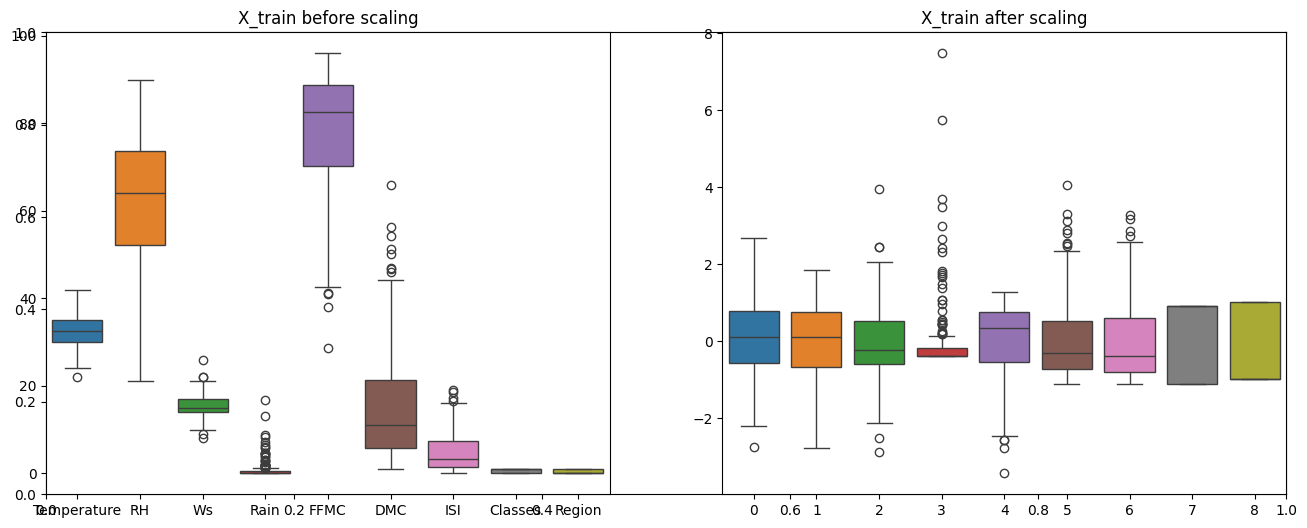

In [26]:
plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling")

### Looking at the above graphs we see why we need to do Scaling!!

## Model Training:

### 1.Linear Regression:

Mean absolute error:  0.546823646524997
R2 score:  0.9847657384266951


<Axes: xlabel='FWI'>

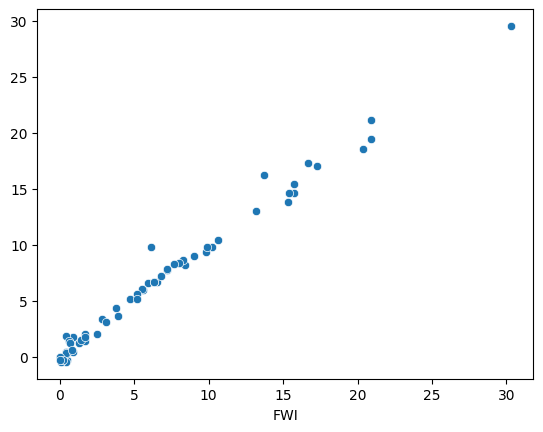

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
linear_model=LinearRegression()
linear_model.fit(X_train_scaled,y_train)
y_pred=linear_model.predict(X_test_scaled)

## errors / performance Metrics:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error: ",mae)
print("R2 score: ",score)

sns.scatterplot(x=y_test,y=y_pred)

### 2.Lasso Regression:

Mean absolute error:  1.133175994914409
R2 score:  0.9492020263112388


<Axes: xlabel='FWI'>

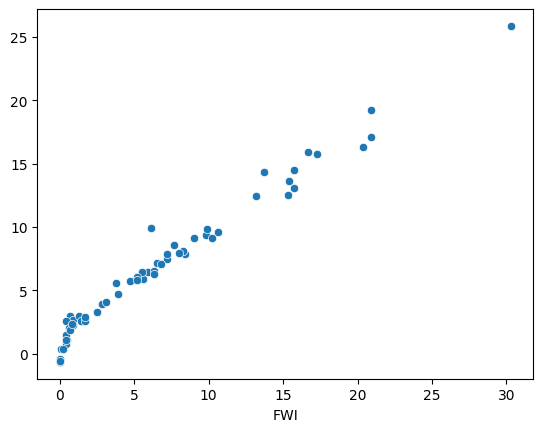

In [28]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error
lasso_model = Lasso()
lasso_model.fit(X_train_scaled,y_train)
y_pred=lasso_model.predict(X_test_scaled)

## errors:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error: ",mae)
print("R2 score: ",score)

sns.scatterplot(x=y_test,y=y_pred)

### 3.Ridge Regression:

Mean absolute error:  0.5642305340105691
R2 score:  0.9842993364555513


<Axes: xlabel='FWI'>

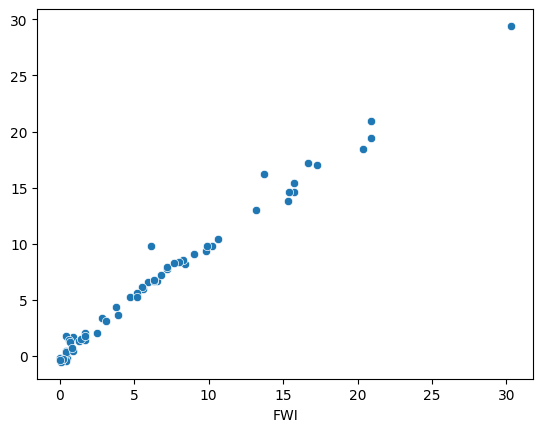

In [29]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error
ridge_model = Ridge()
ridge_model.fit(X_train_scaled,y_train)
y_pred=ridge_model.predict(X_test_scaled)

## errors:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error: ",mae)
print("R2 score: ",score)

sns.scatterplot(x=y_test,y=y_pred)

### 4.ElasticNet Regression

Mean absolute error:  1.8822353634896
R2 score:  0.8753460589519703


<Axes: xlabel='FWI'>

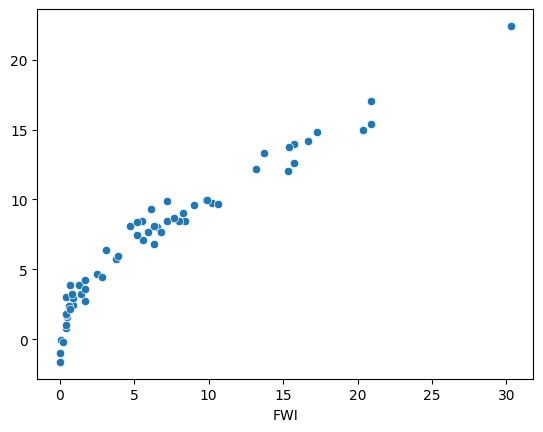

In [30]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error
elastic_model = ElasticNet()
elastic_model.fit(X_train_scaled,y_train)
y_pred= elastic_model.predict(X_test_scaled)

## errors:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error: ",mae)
print("R2 score: ",score)

sns.scatterplot(x=y_test,y=y_pred)

## 5. Cross Validation Lasso :

In [31]:
from sklearn.linear_model import LassoCV
lassoCV_model = LassoCV(cv=5)
lassoCV_model.fit(X_train_scaled,y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [32]:
lassoCV_model.predict(X_test_scaled)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [33]:
## Alpha Value that got selected:
lassoCV_model.alpha_

np.float64(0.05725391318234408)

In [34]:
## Alpha values what the model tried on!!:
lassoCV_model.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [35]:
## mse_path = cv*aphas --> 100 alpha values == 500 ase path values
lassoCV_model.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

Mean absolute error:  0.6199701158263431
R2 score:  0.9820946715928275


<Axes: xlabel='FWI'>

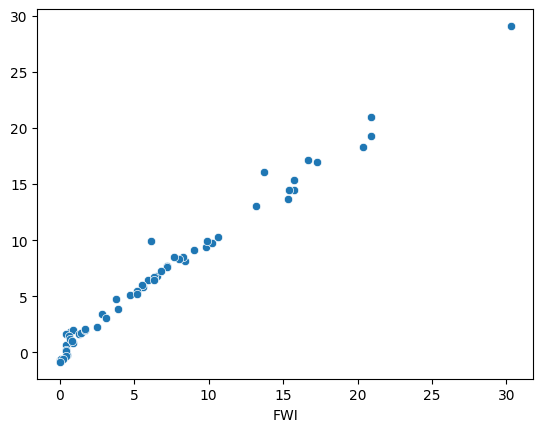

In [36]:
## checking the accuracy of the model via scatter plot
y_pred_Lassocv = lassoCV_model.predict(X_test_scaled)

## errors:
mae=mean_absolute_error(y_test,y_pred_Lassocv)
score=r2_score(y_test,y_pred_Lassocv)

print("Mean absolute error: ",mae)
print("R2 score: ",score)

sns.scatterplot(x=y_test,y=y_pred_Lassocv)

## 6. Ridge Regression cross validation model:

Mean absolute error:  0.5642305340105691
R2 score:  0.9842993364555513


<Axes: xlabel='FWI'>

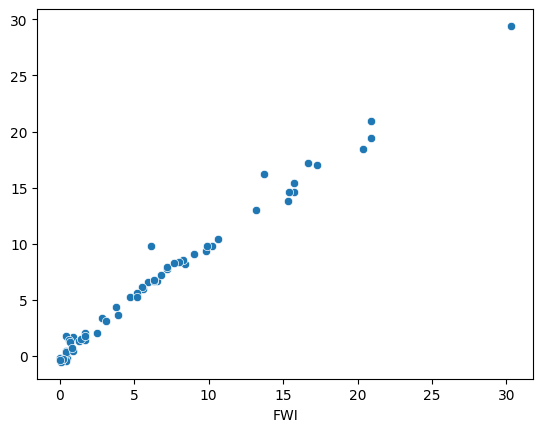

In [37]:
from sklearn.linear_model import RidgeCV
ridge_CV_model = RidgeCV(cv=5)

ridge_CV_model.fit(X_train_scaled,y_train)

y_pred_ridgeCV = ridge_CV_model.predict(X_test_scaled)

## errors:
mae=mean_absolute_error(y_test,y_pred_ridgeCV)
score=r2_score(y_test,y_pred_ridgeCV)

print("Mean absolute error: ",mae)
print("R2 score: ",score)

sns.scatterplot(x=y_test,y=y_pred_ridgeCV)

In [38]:
ridge_CV_model.alphas

(0.1, 1.0, 10.0)

In [39]:
ridge_CV_model.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

### 7. Elastic Net CV:

Mean absolute error:  0.6575946731430901
R2 score:  0.9814217587854941


<Axes: xlabel='FWI'>

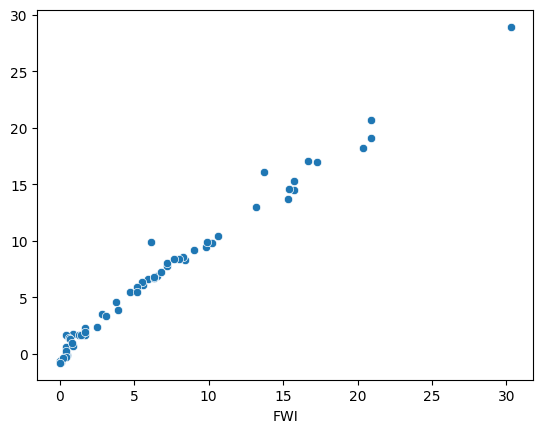

In [40]:
from sklearn.linear_model import ElasticNetCV
elastic_CV_model = ElasticNetCV(cv=5)

elastic_CV_model.fit(X_train_scaled,y_train)

y_pred_elasticCV = elastic_CV_model.predict(X_test_scaled)

## errors:
mae=mean_absolute_error(y_test,y_pred_elasticCV)
score=r2_score(y_test,y_pred_elasticCV)

print("Mean absolute error: ",mae)
print("R2 score: ",score)

sns.scatterplot(x=y_test,y=y_pred_elasticCV)

In [41]:
elastic_CV_model.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

Based on the above model, RidgeCV has the best R2 Score!!

## Pickiling :

1. ML Models
2. Pre-processing models and Standard Scalar

In [42]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [43]:
ridge_CV_model

,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,5
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [44]:
import pickle
pickle.dump(ridge_CV_model,open("ridge_cv.pkl","wb"))
pickle.dump(scaler,open('scalar.pkl','wb'))